<a href="https://colab.research.google.com/github/eduardocarbo/gh-react/blob/main/Modulo_6_Regresi%C3%B3n_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modulo 6: SKLEARN Y STATMODELS, REGRESIÓN LINEAL SIMPLE

Importación de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Preparación de la data

Conexión al drive

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importación de la información

In [62]:
df_data = pd.read_excel("/content/drive/MyDrive/Curso_Python/final_df.xlsx")
display(df_data.shape)
df_data.head(2)

(59043, 16)

,DIRECTORIO,Sexo,Edad,Estado_Civil,Región,recibio_rentas_capital,Percepción_ingreso,Servicios,Bienes,Empleabilidad,Horas,nivel_edu,tipo_casa,estrato,tipo_vivienda,total_ingresos
0,118277,Hombre,28,Esta soltero (a),Pacífica,No,No son suficientes,5,71.0,0.40,0.0,5.6,1,2.0,3,335583.333333
1,118278,Mujer,26,Esta soltero (a),Pacífica,No,No son suficientes,5,75.0,0.25,0.0,4.0,1,2.0,3,190000.000000


Visualización de variables

In [63]:
df_data.columns

Index(['DIRECTORIO', 'Sexo', 'Edad', 'Estado_Civil', 'Región',
       'recibio_rentas_capital', 'Percepción_ingreso', 'Servicios', 'Bienes',
       'Empleabilidad', 'Horas', 'nivel_edu', 'tipo_casa', 'estrato',
       'tipo_vivienda', 'total_ingresos'],
      dtype='object')

Cambiando el nombre de las variables

In [64]:
df_data=df_data.rename(columns={'nivel_edu':'Nivel Educativo','tipo_vivienda':'Tipo Vivienda'})

In [65]:
df_data.columns

Index(['DIRECTORIO', 'Sexo', 'Edad', 'Estado_Civil', 'Región',
       'recibio_rentas_capital', 'Percepción_ingreso', 'Servicios', 'Bienes',
       'Empleabilidad', 'Horas', 'Nivel Educativo', 'tipo_casa', 'estrato',
       'Tipo Vivienda', 'total_ingresos'],
      dtype='object')

# Modelo de regresión lineal simple

Vamos a estimar un modelo en donde se analice la distribución de la variable Ingreso en función del Nivel educativo

Gráfico de variables

Text(0.5, 1.0, 'Nivel educativo')

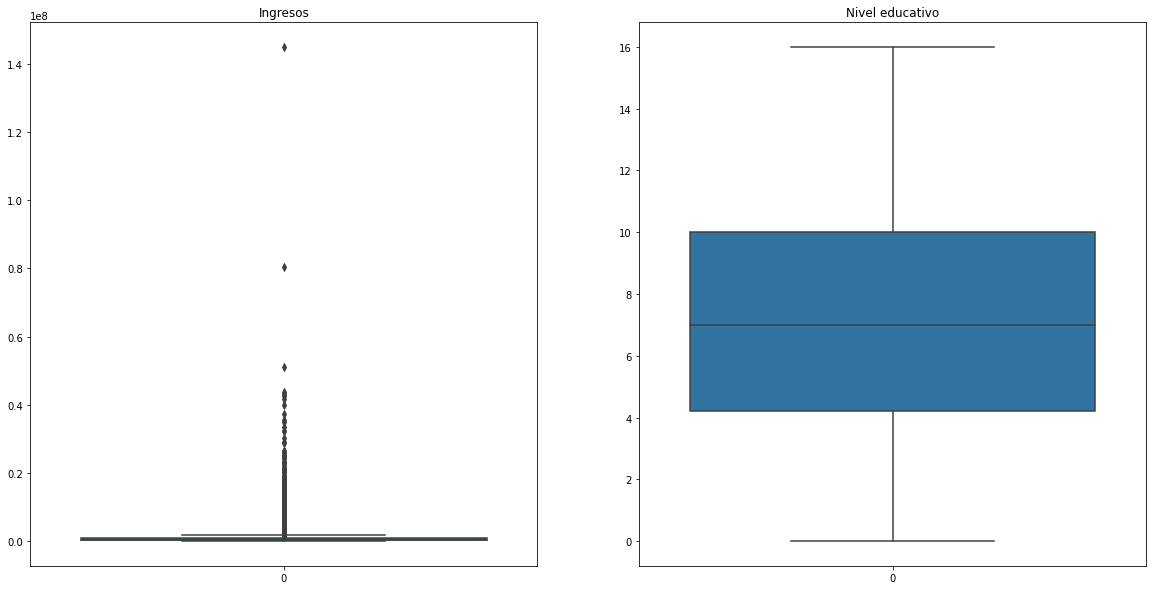

In [66]:
f, axs = plt.subplots(1, 2,figsize=(20, 10))
sns.boxplot(data=df_data["total_ingresos"], ax=axs[0])
axs[0].set_title('Ingresos')

sns.boxplot(data=df_data["Nivel Educativo"], ax=axs[1])
axs[1].set_title('Nivel educativo')

Eliminación de datos atípicos

In [77]:
q1 = df_data.total_ingresos.quantile(0.25)
q3 = df_data.total_ingresos.quantile(0.75)
RIQ = q3-q1

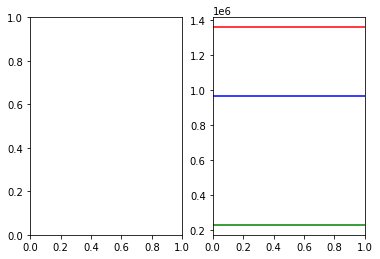

In [92]:
f, axs = plt.subplots(1, 2)
#sns.boxplot(data=df_data["total_ingresos"])
plt.axhline(min(df_data.total_ingresos), color='g')
plt.axhline(q3+1.5*RIQ, color='b')
plt.axhline(q3+3*RIQ, color='r')
#sns.boxplot(data=df_data["nivel_edu"])

###  Gráfico dinámico

In [86]:
def plot_function(x_mill = 9000000,y=50000, bins = 10, color='red'):
    binwidth = (max(df_data.total_ingresos) - min(df_data.total_ingresos))/ bins
    plt.hist(df_data.total_ingresos, 
             bins=np.arange(min(df_data.total_ingresos), max(df_data.total_ingresos) + binwidth, binwidth),
             color=color)
    plt.xlim(0,x_mill)
    plt.ylim(0,y)
    plt.show()

In [87]:
from ipywidgets import interact 
interact(plot_function,
         x_mill = (0, 9000000, 100000),
         y = (0, 50000, 1000),
         bins = (1, 1000, 1),
         color=['red', 'yellow', 'blue','gray','green','white','black'])
None

interactive(children=(IntSlider(value=9000000, description='x_mill', max=9000000, step=100000), IntSlider(valu…

### Selección de una muestra para correr el modelo

Inicialmente vamos a correr el modelo con datos que se encuentren dentro del recorrido intercuantil y además vamos a tomar sólo una muestra al azar de 100 de ellos para ver mejor las gráficas.

In [71]:
df_data.head(100)

,DIRECTORIO,Sexo,Edad,Estado_Civil,Región,recibio_rentas_capital,Percepción_ingreso,Servicios,Bienes,Empleabilidad,Horas,Nivel Educativo,tipo_casa,estrato,Tipo Vivienda,total_ingresos
0,118277,Hombre,28,Esta soltero (a),Pacífica,No,No son suficientes,5,71.0,0.40,0.0,5.600000,1,2.0,3,3.355833e+05
1,118278,Mujer,26,Esta soltero (a),Pacífica,No,No son suficientes,5,75.0,0.25,0.0,4.000000,1,2.0,3,1.900000e+05
2,118279,Mujer,22,No esta casado(a) y vive en pareja hace dos añ...,Pacífica,No,Son suficientes,5,165.0,0.50,0.0,8.000000,2,1.0,3,9.375000e+05
3,118280,Hombre,33,Esta soltero (a),Pacífica,No,No son suficientes,4,54.0,1.00,0.0,4.000000,2,2.0,1,7.000000e+05
4,118285,Hombre,27,Esta soltero (a),Pacífica,No,No son suficientes,3,23.0,0.40,0.0,6.400000,1,1.0,1,2.303333e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,118507,Mujer,29,No esta casado(a) y vive en pareja hace dos añ...,Bogotá,Si,Son suficientes,5,390.0,0.50,0.0,10.666667,2,3.0,3,2.808333e+06
96,118508,Mujer,50,Esta separado(a) o divorciado(a),Bogotá,Si,Son suficientes,5,331.0,1.00,0.0,16.000000,2,3.0,1,2.657101e+07
97,118511,Mujer,31,Esta soltero (a),Bogotá,No,Son suficientes,5,341.0,0.50,0.0,16.000000,2,3.0,3,4.400000e+06
98,118512,Hombre,30,Esta soltero (a),Bogotá,No,Son suficientes,5,398.0,0.25,0.0,13.000000,2,3.0,1,2.650000e+06


In [72]:
from numpy.core.fromnumeric import repeat
indices = df_data[(df_data.total_ingresos<q3) & (df_data.total_ingresos>q1)].index
display(indices)
muestra=np.random.choice(indices,100,replace=False)
display(muestra)
df_data=df_data.loc[muestra]

Int64Index([    0,     3,     4,     5,     6,     9,    10,    12,    13,
               18,
            ...
            59017, 59018, 59019, 59020, 59023, 59026, 59027, 59029, 59033,
            59039],
           dtype='int64', length=29474)

array([ 4036, 28713,  2267, 22457, 14498, 53342, 50089,  6603, 13983,
       20218, 51280, 33032, 35377, 52206,  4073, 33100, 32465, 34456,
       58346, 26450, 56346,  1755,  7784, 17546, 30392, 39948, 54407,
        6794, 52202, 14858, 22049, 14844, 54306, 19207, 29380, 50172,
       39015, 48962, 51891, 20615, 45444, 48155, 53484,  7531, 37733,
       14245, 42763, 55811, 42008,  8786, 57828,  6369,  9467, 33247,
       29316, 35699, 31243, 57186, 18442, 32094, 14272, 56919, 18117,
       40733,  3681, 35530, 45344, 31632,  9844, 17080, 29287, 48597,
       12384, 18249, 51636, 45235, 12338, 35829, 40326, 31595, 54989,
       30610, 35839, 24363, 15561,  4090, 31893,  5214, 52139, 14415,
       23401, 31232, 25046, 21363, 52252, 27981, 37093, 18291, 57635,
       39376])

#### Eliminación de datos atípicos anormales

In [75]:
#df_data = df_data[df_data.total_ingresos<q3+1.5*RIQ]
#df_data.shape

## Diagrama de dispersión de Ingresos y Nivel educativo

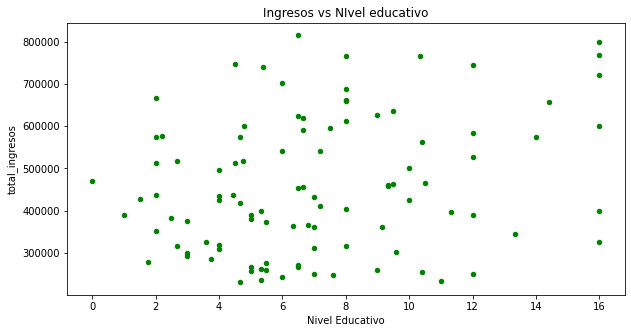

In [93]:
fig, ax = plt.subplots(figsize=(10, 5))

df_data.plot(
    x    = 'Nivel Educativo',
    y    = 'total_ingresos',
    c    = 'green',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Ingresos vs NIvel educativo');

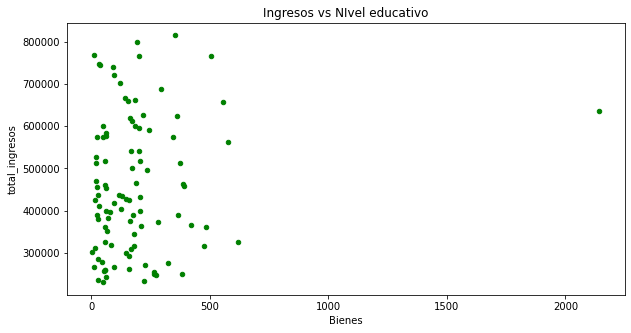

In [94]:
fig, ax = plt.subplots(figsize=(10, 5))

df_data.plot(
    x    = 'Bienes',
    y    = 'total_ingresos',
    c    = 'green',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Ingresos vs NIvel educativo');

## Correlación lineal entre las variables

In [99]:
from scipy.stats import pearsonr
corr_test = pearsonr(x = df_data['Nivel Educativo'], y =  df_data['total_ingresos'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])#primer valor
print("P-value: ", corr_test[1])#segundo valor

Coeficiente de correlación de Pearson:  0.25627323358485465
P-value:  0.01006335696732523


In [101]:
from scipy.stats import pearsonr
corr_test = pearsonr(x = df_data['Bienes'], y =  df_data['total_ingresos'])
print("Coeficiente de correlación de Pearson: ", str(round(corr_test[0],4)*100) + '%')
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  14.56%
P-value:  0.14829397704981942


## Estimación del modelo

Selección de variables independientes

In [102]:
inde=['Nivel Educativo']
X=df_data[inde]
X.head(3)

,Nivel Educativo
4036,7.0
28713,2.0
2267,5.0


Agregar la constante al conjunto de variables independientes

In [103]:
X = sm.add_constant(X)
X.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Nivel Educativo
4036,1.0,7.000000
28713,1.0,2.000000
2267,1.0,5.000000
22457,1.0,6.666667
14498,1.0,3.000000


Selección de variable dependiente

In [105]:
y=df_data['total_ingresos']
y.head(3)

4036     360000.0
28713    512500.0
2267     390000.0
Name: total_ingresos, dtype: float64

Separación de registros de entrenamiento y prueba

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [107]:
display(X_train.head(2))
display(y_train.head(2))
display(X_test.head(2))
display(y_test.head(2))

,const,Nivel Educativo
48962,1.0,14.4
18442,1.0,8.0


48962    656666.666667
18442    316666.666667
Name: total_ingresos, dtype: float64

,const,Nivel Educativo
7531,1.0,1.0
13983,1.0,2.5


7531     390000.000000
13983    383333.333333
Name: total_ingresos, dtype: float64

In [ ]:
display(X_train.head(2))
display(X_test.head(2))

,const,Nivel Educativo
19385,1.0,9.333333
24987,1.0,8.000000


,const,Nivel Educativo
27525,1.0,11.333333
21543,1.0,9.500000


Estimación del modelo

In [ ]:
model = sm.OLS(y_train,X_train)
results = model.fit()

Visualizacion de resultados

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Ingresos   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     7.922
Date:                Mon, 29 Aug 2022   Prob (F-statistic):            0.00638
Time:                        02:05:50   Log-Likelihood:                -939.67
No. Observations:                  70   AIC:                             1883.
Df Residuals:                      68   BIC:                             1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.601e+05   4.79e+04     

Parámetros del modelo

In [ ]:
results.params

const              460050.199503
Nivel Educativo     15141.599163
dtype: float64

In [ ]:
display(X_test.head(2))
display(y_test.head(2))

,const,Nivel Educativo
27525,1.0,11.333333
21543,1.0,9.500000


27525    425583.333333
21543    638541.666667
Name: Ingresos, dtype: float64

## Intervalos de confianza

In [ ]:
results.conf_int(alpha=0.05) #Confianza del 95%

,0,1
const,364457.168076,555643.230931
Nivel Educativo,4406.967377,25876.230949


# Predicciones

In [ ]:
display(X_test.head(2))

,const,Nivel Educativo
27525,1.0,11.333333
21543,1.0,9.500000


In [ ]:
display(y_test.head(2))

27525    425583.333333
21543    638541.666667
Name: Ingresos, dtype: float64

In [ ]:
results.predict(X_test).head(2)

27525    631654.990018
21543    603895.391552
dtype: float64

## Intervalos de confianza predicciones

In [ ]:
Pred_test=results.get_prediction(X_test).summary_frame().sort_values("mean")

In [ ]:
Pred_test.head(5)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
33453,470144.598945,44665.241260,381016.497720,559272.700171,127215.777785,813073.420105
41345,490333.397829,38371.020763,413765.218049,566901.577610,150452.471461,830214.324198
18745,510522.196713,32443.506502,445782.187479,575262.205948,173109.057150,847935.336277
29471,510522.196713,32443.506502,445782.187479,575262.205948,173109.057150,847935.336277
15810,530710.995598,27124.185075,476585.527003,584836.464192,195172.735030,866249.256165


Agregando variables independientes a las predicciones

In [ ]:
Pred_test["X"]=X_test['Nivel Educativo']
Pred_test["Observado"]= y_test

In [ ]:
Pred_test.head(5)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,X,Observado
33453,470144.598945,44665.241260,381016.497720,559272.700171,127215.777785,813073.420105,0.666667,536111.111111
41345,490333.397829,38371.020763,413765.218049,566901.577610,150452.471461,830214.324198,2.000000,540000.000000
18745,510522.196713,32443.506502,445782.187479,575262.205948,173109.057150,847935.336277,3.333333,470000.000000
29471,510522.196713,32443.506502,445782.187479,575262.205948,173109.057150,847935.336277,3.333333,468068.822984
15810,530710.995598,27124.185075,476585.527003,584836.464192,195172.735030,866249.256165,4.666667,370166.666667


In [ ]:
Pred_test=Pred_test.sort_values("mean")

In [ ]:
Pred_test.head(5)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,X,Observado
33453,470144.598945,44665.241260,381016.497720,559272.700171,127215.777785,813073.420105,0.666667,536111.111111
41345,490333.397829,38371.020763,413765.218049,566901.577610,150452.471461,830214.324198,2.000000,540000.000000
18745,510522.196713,32443.506502,445782.187479,575262.205948,173109.057150,847935.336277,3.333333,470000.000000
29471,510522.196713,32443.506502,445782.187479,575262.205948,173109.057150,847935.336277,3.333333,468068.822984
15810,530710.995598,27124.185075,476585.527003,584836.464192,195172.735030,866249.256165,4.666667,370166.666667


## Principales gráficos de la regresión lineal

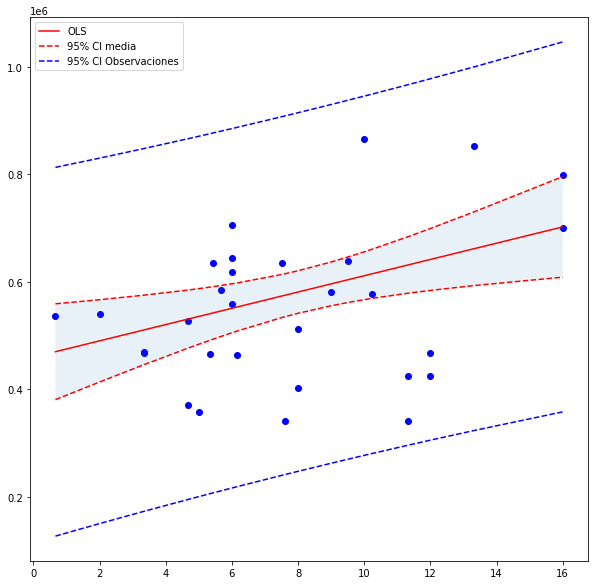

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(Pred_test["X"], Pred_test.Observado, marker='o', color = "blue")
ax.plot(Pred_test["X"], Pred_test["mean"], linestyle='-', label="OLS",color="red")
ax.plot(Pred_test["X"], Pred_test["mean_ci_lower"], linestyle='--', color='red', label="95% CI media")
ax.plot(Pred_test["X"], Pred_test["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(Pred_test["X"], Pred_test["mean_ci_lower"], Pred_test["mean_ci_upper"], alpha=0.1)
ax.plot(Pred_test["X"], Pred_test["obs_ci_lower"], linestyle='--', color='blue', label="95% CI Observaciones")
ax.plot(Pred_test["X"], Pred_test["obs_ci_upper"], linestyle='--', color='blue')


ax.legend();

## Pruebas de bondad de ajuste

In [ ]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

coefficient of determination: 0.10434915873481931
adjusted coefficient of determination: 0.09117782283386078
regression coefficients: const              460050.199503
Nivel Educativo     15141.599163
dtype: float64


## Diagnóstico de los residuos

In [ ]:
residuos_test   = Pred_test["mean"] - Pred_test["Observado"]

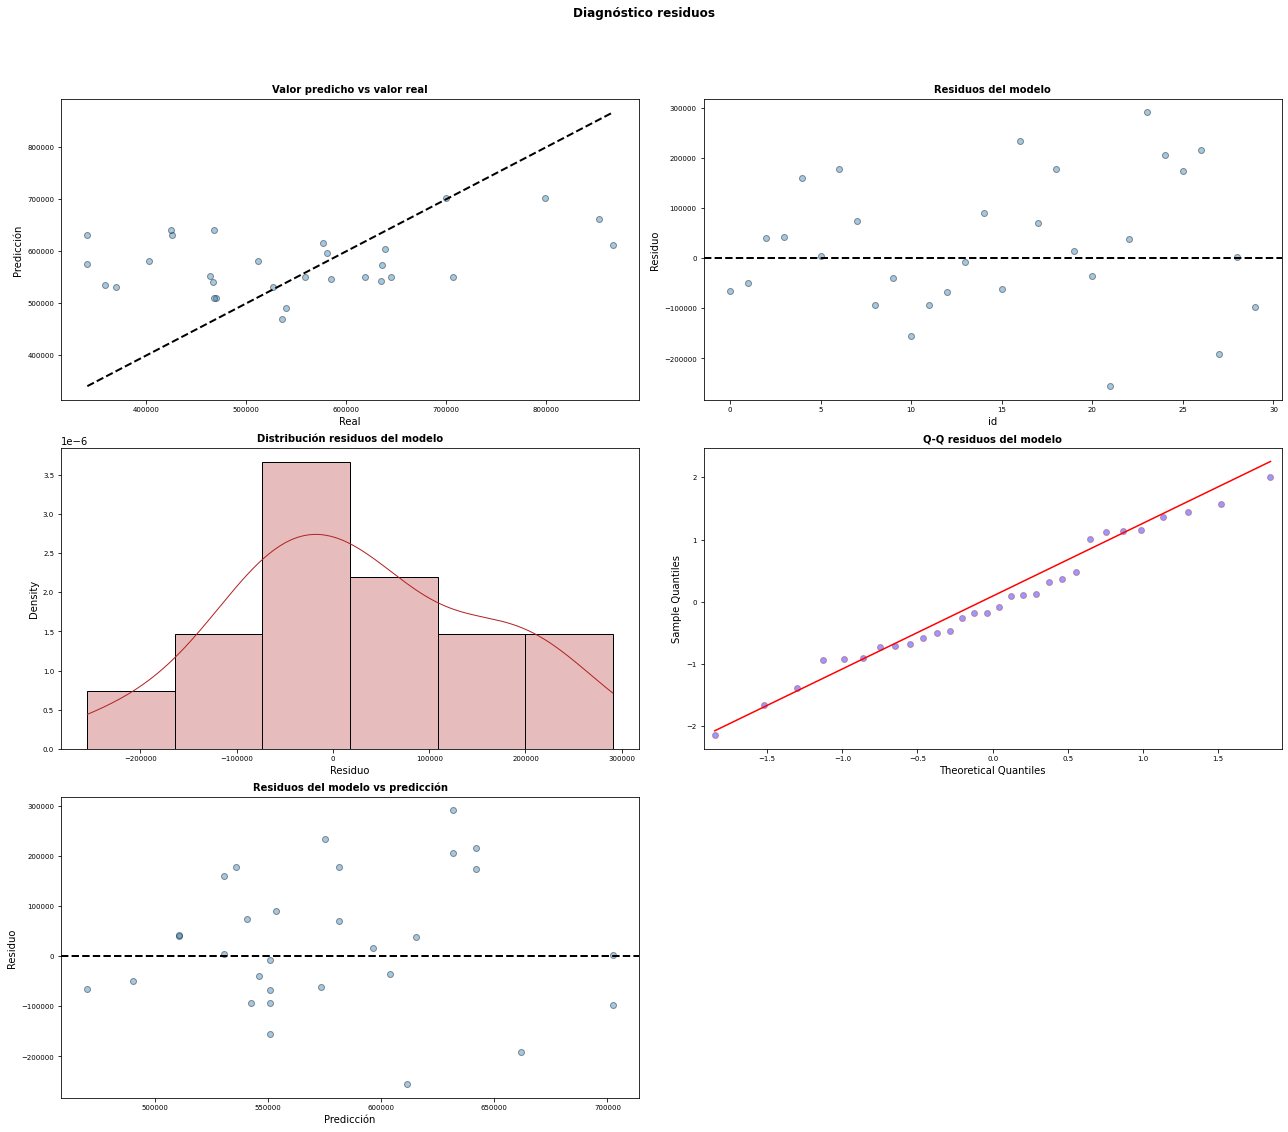

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 16))

axes[0, 0].scatter(Pred_test["Observado"],Pred_test["mean"], edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([Pred_test["Observado"].min(), Pred_test["Observado"].max()],
                [Pred_test["Observado"].min(), Pred_test["Observado"].max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(residuos_test))), residuos_test,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_test,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_test,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(Pred_test["mean"], residuos_test,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

## Test de Normalidad

Shapiro test

In [ ]:
from scipy import stats
shapiro_test = stats.shapiro(residuos_test)
shapiro_test

ShapiroResult(statistic=0.9769253730773926, pvalue=0.7392574548721313)

In [ ]:
k2, p_value = stats.normaltest(residuos_test)
print('Estadístico: ' + str(k2)+'p_value: ' + str(p_value))

Estadístico: 0.35366238985642034p_value: 0.8379212179366673
